Кравченко Юлии ПИ19-4 Вариант 12

Лабораторная работа 4

Задача максимизации прибыли производителя

In [2]:
import scipy.optimize
import numpy as np
from scipy.optimize import minimize
from sympy import *
import math 
import sympy as sym
from scipy import optimize,arange

import matplotlib.pyplot as plt
from sympy import symbols, Function
import sympy as sm
import pandas as pd


Данные для подстановки

Q = A*((x)**(a1))*((y)**(a2))

D = p * x + y * q - I

или

D = w1*x+y*w2-I

A = 40

a1 = 1/2

a2 = 0.25

w1 = p = 5

w2 = q = 8

I = 100

Анализируемая функция f  для переменных x,y :
 f=  A*x**a1*y**a2
Ограничения:  -I + p*x + q*y =0
Вспомогательная функция Лагранжа :
  lambda*(5*x + 8*y - 100) + 40*sqrt(x)*y**0.25
df/dx = 5*lambda + 20*y**0.25/sqrt(x) =0
df/dy = 8*lambda + 10.0*sqrt(x)/y**0.75 =0
[{x: 13.3333333333333, lambda: -1.56508458007329, y: 4.16666666666667}]
Мах при наличии бюджетных ограничений x= 13
Мах при наличии бюджетных ограничений x= 4
Функция полезности при макс x и y: 208.677944009772
D при макс x и y: 7.105427357601002e-15
df/dp1 = -5 + 20*y**0.25/sqrt(x)
df/dp2 = 10.0*sqrt(x)/y**0.75 - 8
 Точка Оптимальный план(x,y) - [{x: 80.0000000000000, y: 25.0000000000000}]
Функция прибыли x max 80
 Функция прибыли y max 25
Максимальная прибыль: 200.000000000000


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return 40*sqrt(x)*y**0.25 - 5*x - 8*y
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in power
  return 40*sqrt(x)*y**0.25 - 5*x - 8*y
C:\Users\kjd20\AppData\Local\Temp/ipykernel_11184/2215073048.py:65: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X,Y,Z)


<Figure size 432x288 with 0 Axes>

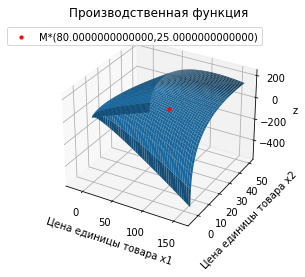

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return 40*sqrt(x)*y**0.25 - 5*x - 8*y
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in power
  return 40*sqrt(x)*y**0.25 - 5*x - 8*y
C:\Users\kjd20\AppData\Local\Temp/ipykernel_11184/2215073048.py:99: UserWarning: No contour levels were found within the data range.
  cr = ax.contour(l, k, Z, levels=[P1], colors="green")


<Figure size 432x288 with 0 Axes>

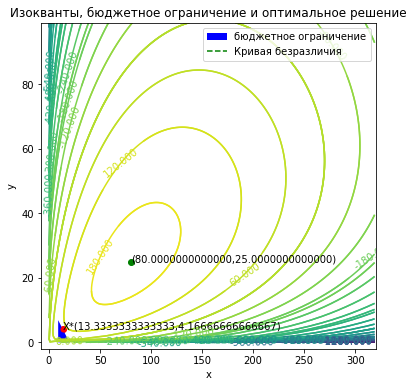

In [3]:
def maxPribProiz():
    x,y,lam,p,q,I, a1,a2,w1,w2,A=sm.symbols(' x y lambda p q I a1 a2 w1 w2 A' )
    Q1 = eval(input("Введите функцию спроса Q, например A*((x)**(a1))*((y)**(a2)):"))
    D = eval(input("Введите функцию спроса D, например p * x + y * q - I:"))
    A1 = int(input("A"))
    a3 = input("a1")
    a4 = input("a2")
    p1 = int(input("p")) # может обозначатся как w1
    q1 = int(input("q")) # может обозначатся как w2
    I1 = int(input("I"))
    w1 = int(input("w1"))
    w2 = int(input("w2"))
    print('Анализируемая функция f  для переменных x,y :\n f= ', Q1)
    print('Ограничения: ', D,'=0')
    Q1 = simplify(Q1)
    lagr1 = Q1 + D*lam
    lagr = simplify(lagr1)
    lagr = lagr.subs([(A,A1),(a1,a3),(a2,a4),(p,p1),(q,q1),(I,I1)])
    D = D.subs([(p,p1),(q,q1),(I,I1)])
    Q3 = Q1.subs([(A,A1),(a1,a1),(a2,a2)])
    print('Вспомогательная функция Лагранжа :\n ',lagr)
    fx=sm.diff(lagr,x)
    print('df/dx =',fx,'=0')
    fy=sm.diff(lagr,y)
    print('df/dy =',fy,'=0')
    sols=solve([fx,fy,D],[x,y,lam], dict=True)
    print(sols)
    x11 = sols[0][x]
    y22 = sols[0][y]
    print("Мах при наличии бюджетных ограничений x=",int(x11))
    print("Мах при наличии бюджетных ограничений x=",int(y22))
    Q2 = Q1.subs([(x,x11),(y,y22),(a1,a3),(a2,a4),(A,A1)])
    print("Функция полезности при макс x и y:", Q2)
    D1 = D.subs([(x,x11),(y,y22)])
    print("D при макс x и y:", float(D1))
    # Считаем прибыль
    P = Q1 - w1*x - w2 * y #Функция прибыли
    P = simplify(P)
    P = P.subs([(A,A1),(a1,a3),(a2,a4),(w1,p1),(w2,q1),(I,I1)])

    proizvid1 = P.diff(x)
    print('df/dp1 =', proizvid1)
    proizvid2 =  P.diff(y)
    print('df/dp2 =', proizvid2)
    sols = solve([proizvid1,proizvid2], x,y ,dict=True)
    print(' Точка Оптимальный план(x,y) -', sols)
    print("Функция прибыли x max", int(sols[0][x]))
    p11 = sols[0][x]
    print(" Функция прибыли y max", int(sols[0][y]))
    p22 =sols[0][y]
    p111 = int(p11)
    p222 = int(p22)
    P1 = P.subs([(A,A1),(a1,a3),(a2,a4),(w1,p1),(w2,q1),(I,I1),(x,p11),(y,p22)])
    print("Максимальная прибыль:", P1)

    #3D график
    plt.figure()
    
    fig = plt.figure()
    ax=fig.add_subplot(1, 1, 1, projection = '3d')
    x = np.linspace(-p111*0.2,p111*2, p111*10)
    y = np.linspace(-p222*0.2,p222*2,p222*10)
    X,Y = np.meshgrid(x,y)
    Z = lambdify(["x","y"], P)(X,Y)
    ax.plot_surface(X,Y,Z)
    ax.scatter(p11,p22, s =10, color="red", label='М*({p11},{p22})'.format(p11=p11, p22=p22))
    plt.title('Производственная функция')
    plt.xlabel("Цена единицы товара x1")
    plt.ylabel("Цена единицы товара x2")
    ax.set_zlabel("z")
    plt.legend()
    plt.show()
    #График №2
    x,y = np.mgrid[-0.1*p11:4*p11,-0.1*p22:4*p22]                
    z = lambdify(["x","y"], P)(x,y)
    fig = plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(x11,y22, color='red')
    ax.scatter(p11, p22, color="green")
    ax.contour(x,y,z, levels = 30)

    plt.text(x11,y22,'X*({x11},{y22})'.format(x11=x11, y22=y22))
    plt.text(p11,p22, "({p11},{p22})".format(p11=p11, p22=p22))
 
    x1 = np.linspace(w2 + 1, ( I1 / w1))
    y_treug = (I1 - w1 * x1) / w2
    y_2 = 0
    fig2 = ax.fill_between(x1, y_2, y_treug)
    fig2.set_facecolor('blue')
    fig2.set_label("бюджетное ограничение")

    curv = ax.contour(x,y,z, levels = 30)
    plt.clabel(curv)

    l = np.linspace(2, 320, 700)
    k = np.linspace(2, 90, 700)
    X, Y = np.meshgrid(l, k) # Определение координатных векторов
    Z = lambdify(["x","y"], P)(X,Y)
    cr = ax.contour(l, k, Z, levels=[P1], colors="green")
    cr.collections[0].set_label("Кривая безразличия")

    fig.set_figwidth(9)    #  ширина и
    fig.set_figheight(9) #  высота "Figure"
    ax.contour(x,y,z, levels = 10)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Изокванты, бюджетное ограничение и оптимальное решение')
    plt.legend() 
    plt.plot(x11, y22, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")

    fig.set_figwidth(6)
    fig.set_figheight(6)

    ax.contour(x,y,z, levels = 10)
    #plt.legend()
    plt.show()
maxPribProiz()    